# Topic 1.4: Intensity-based registration

This notebook combines theory with exercises to support the understanding of intensity-based registration in medical image analysis. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation by importing your functions to this notebook. Use available markdown sections to fill in your answers to questions as you proceed through the notebook.

**Contents:** <br>

1. [Intensity-based registration](#int_registration)<br>


2. [Optimization for intensity-based registration](#optim)<br>

   - [Gradient ascent/descent](#gradient)<br>
    

3. [Intensity-based similarity metrics (exercises)](#int_registration_ex)<br>
    
    3.1 [Numerical differentiation](#numerical_diff)<br>
    
    3.2 [Similarity as a function of image transformation](#img_trans)<br>
    
    3.3 [Similarity as a function of rotation](#rotation)
    
**References:**<br>

[1] Intensity-based registration: [Fitzpatrick, J.M., et al. Image registration, chapter 8.5](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)

In [1]:
%load_ext autoreload
%autoreload 2

<div id="int_registration"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 1. Intensity-based registration

Besides points and surface features, image intensity is an alternative registration basis. It is even the most widely used registration basis. In general, the term *intensity* refers to scalar values of image pixels or voxels, which are used to calculate transformations between two images. Compared with point-based registration, intensity-based registration ([Fitzpatrick, J.M., et al. Image registration, chapter 8.5](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)) requires less user interaction as it works by iterative optimization of an intensity-based similarity measure (the concepts of similarity measures are explained in notebook [1.3_Registration_image-similarity-metrics](../reader/1.3_Image-similarity-metrics.ipynb)). When one of the images is being transformed, the similarity measures are a function of the image transformation. This is “step 1” in our general approach to registering two images. “Step 2” is finding the parameters that find the transformation that maximizes the similarity between two images. 

Intensity-based registration methods are relatively easy to automate and require few manual steps. However, their application is restricted to a limited range of images given the need for image preprocessing. Algorithms exploiting intensity-based image registration can be used for various purposes: registration of images with different dimensionality; intermodal and intramodal registration; and registration involving complex transforms, to name some. 


<div id="optim"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 2. Optimization for intensity-based registration

General procedure for maximizing similarity functions is:

1. Start with some initial values for the parameters (e.g. transformation $T$).
2. Slightly update the parameters in such a way that the similarity will slightly increase.
3. Repeat until the similarity *stops increasing*.

<div id="gradient"></div>

### Gradient ascent / descent:

To optimize similarity functions in intensity-based registration, we typically use gradient ascent (to localize function maximum) or gradient descent (to localize function minimum). In other words, these numerical methods help us find the minimum of the error or the maximum of the similarity in registration. To find the minimum and maximum of a function, we can compute the derivative and set it to zero (in case of more variables, set all partial derivatives to zero). 

Gradient ascent algorithm for maximizing a function $f(\mathbf{w})$:

1. Choose some initial values of the parameters $\mathbf{w}$
2. Calculate the value for the gradient of $f(\mathbf{w})$ for the current parameters
3. Update the parameters in the direction of the gradient: $\mathbf{w} \leftarrow \mathbf{w} \color{red}{+} \mu\nabla_{\mathbf{w}}f(\mathbf{w})$

If we want to minimize the function we move in the direction opposite of the gradient (gradient descent): $\mathbf{w} \leftarrow \mathbf{w} \color{red}{-} \mu\nabla_{\mathbf{w}}f(\mathbf{w})$

The parameter $\mu$ is called learning rate. It controls how fast we move towards the maximum (minimum). If $\mu$ is too small, the maximum (or minimum) might not be reached in reasonable time. If $\mu$ is too large, the maximum (minimum) might be missed. Initialization is important. Different starting points will result in different found maxima (and not always global).

<div id="int_registration_ex"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 3. Intensity-based image registration (exercises)

<div id="numerical_diff"></div>

### 3.1 Numerical differentiation
Numerical differentiation refers to finding the value of a derivative of a given function at a given point without the need to analytically differentiate the function. This technique can be very useful, for example, when the analytical expression for the derivative is too complex and computationally expensive to evaluate. In such a case it might be significantly faster to approximate the derivative instead of computing its exact value.

A simple expression that approximates the derivative of a function $f(x)$ is:

\begin{equation}
\frac{d}{d x} f(x) \approx \frac{f(x+h)-f(x)}{h}
\end{equation}

where $h$ is some very small positive number. When $h$ approaches zero this expression becomes the true value of the derivative:

\begin{equation}
\frac{d}{d x} f(x)=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}
\end{equation}

A better approximation of the derivative is the symmetric difference quotient given by the following expression:

\begin{equation}
\frac{d}{d x} f(x) \approx \frac{f\left(x+\frac{h}{2}\right)-f\left(x-\frac{h}{2}\right)}{h}
\end{equation}

Numerical differentiation can also be used to approximate the partial derivatives of a function with more than one variable, for example:

\begin{equation}
\frac{\partial}{\partial x} f(x, y) \approx \frac{f\left(x+\frac{h}{2}, y\right)-f\left(x-\frac{h}{2}, y\right)}{h}
\end{equation}

\begin{equation}
\frac{\partial}{\partial y} f(x, y) \approx \frac{f\left(x, y+\frac{h}{2}\right)-f\left(x, y-\frac{h}{2}\right)}{h}
\end{equation}

and in turn the gradient:

\begin{equation}
\ f(x, y)=\left[ \begin{array}{c}{\frac{\partial}{\partial x} f(x, y)} \\ {\frac{\partial}{\partial y} f(x, y)}\end{array}\right] \approx\left[\frac{\frac{f\left(x+\frac{h}{2}, y\right)-f\left(x-\frac{h}{2}, y\right)}{h}}{\frac{f\left(x, y+\frac{h}{2}\right)-f\left(x, y-\frac{h}{2}\right)}{h}}\right]
\end{equation}

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.1.1*:
In the provided template for the `ngradient()` function in `SECTION 4` of the `registration.py` module, implement the computation of the gradient of a function with numerical differentiation using the symmetric difference quotient. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.1.2*:

Test your implementation of `ngradient()`. An easy way to test this function is to numerically compute the gradient and then verify with the analytical expression. For example, since $\frac{d}{d x} e^{x}=e^{x}$ the the numerical derivative $\frac{d}{d x} e^{x}$ should have approximately the same value as $e^{x}$. Write your test cases in the provided `ngradient_test()` script in `SECTION 4` of the `registration_tests.py` module.

In [2]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import ngradient_test

ngradient_test()

Test successful!


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>  

### *Question 3.1.1*:
The `ndgradient()` function can be used to perform optimization with the gradient ascent/descent method. Describe in short how this algorithm works. What is the role of the learning rate parameter in gradient descent/ascent?

<font style="color:red">Type your answer here</font>

<div id="img_trans"></div>

### 3.2 Similarity as a function of image transformation

In the previous section, you have analyzed how the similarity between two images changes as a function of the rotation of one of the images. The goal of this exercise is to write a Python function that, given two images and the parameters of some transformation between them, will output the similarity measure. This function can then be used in combination with `ndgradient()` from the previous exercise to perform gradient based optimization of the transformation parameters.

The function `rigid_corr()` in `SECTION 4` of the `registration.py` module computes the normalized cross-correlation between a fixed and a moving image transformed with rigid transformation. The three parameters of the rigid transformation (rotation angle and 2D translation vector) are passed to the function as a vector $\mathbf{x}$.

Here is an example of how to use this function to numerically compute the derivative for a set of parameters:

```python
import numpy as np
import matplotlib.pyplot as plt
from registration_utils import ngradient

I = plt.imread('some_fixed_image.tif')
Im = plt.imread('some_moving_image.tif')

# create an instance of rigid_corr for this particular pair of images
rigid_corr_I_Im = lambda x: rigid_corr(I, Im, x)

x = [np.pi/4, 10/100, 20/100]

# computes the numerical gradient at x
g = reg.ndgradient(rigid_corr_I_Im, x)
```

In this code snippet, we first create an instance of the function `rigid_corr()` where the first to input parameters (the fixed and moving image) are preset. The new function `rigid_corr_I_Im()` now has only a single input parameter - the vector $\mathbf{x}$ that stores the rotation angle and the translation. `rigid_corr_I_Im()` can be used with `ndgradient()` to compute the gradient of the similarity function at a particular point (in this example for the point `x = [pi/4, 10/100, 20/100]`). 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.2.1*:
Let's assume that after executing this code snippet, the computed value for the derivative at point `x = [pi/4, 10, 20]` is `g = [10, -5, 30]`. Will increasing the rotation angle (the first parameter of $\mathbf{x}$) by a very small amount increase or decrease the similarity between the fixed and transformed moving image? Motivate your answer.

<font style="color:red">Type your answer here</font>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.2.1*:
Using `rigid_corr()` as an example, implement the following two functions in `SECTION 4` of the `registration.py` module:

1. `affine_corr()` that computes the normalized cross correlation for a pair of images as a function of affine transformation, and<br>
2. `affine_mi()` that computes the mutual information between a pair of images as a function of affine transformation.

The only thing that you need to change is the length of the parameter vector, which for affine registration should contain the rotation, scaling, shearing and translation parameters, the computation of the transformation matrix and for `affine_mi()` the function call that computes the similarity measure.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import registration as reg

I = plt.imread('../data/cameraman.tif')
Im = plt.imread('../data/cameraman.tif')

# create an instance of rigid_corr for this particular pair of images
rigid_corr_I_Im = lambda x: reg.affine_mi(I, Im, x,False)

x = [0, 0.11,0.1,0.1,0.1, 0]

rigid_corr_I_Im(x)

-23280.39522548896

<div id="rotation"></div>

### 3.3 Similarity as a function of rotation

Let's put the implementations of correlation and mutual information functions to some use. You are going to compute the similarity between an image and a rotated version of that image for different rotation angles. The `registration_metrics_demo()` Python function contains code for performing this analysis. Study the function and make sure you understand what it does (you can skip the part about visualization of the results).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.3.1*:
Run the demo and describe and analyze the results.

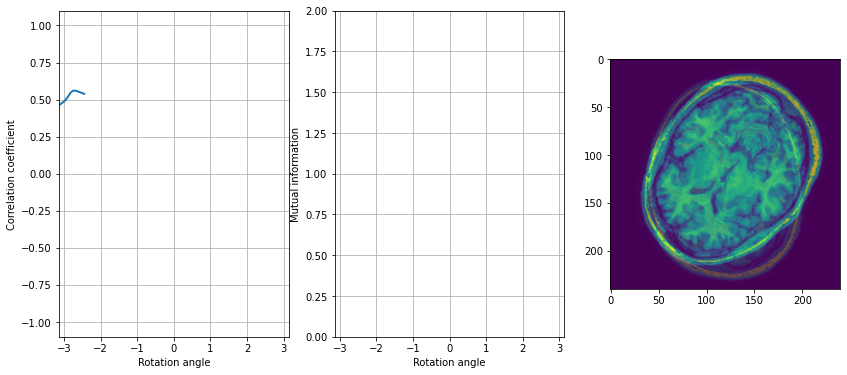

KeyboardInterrupt: 

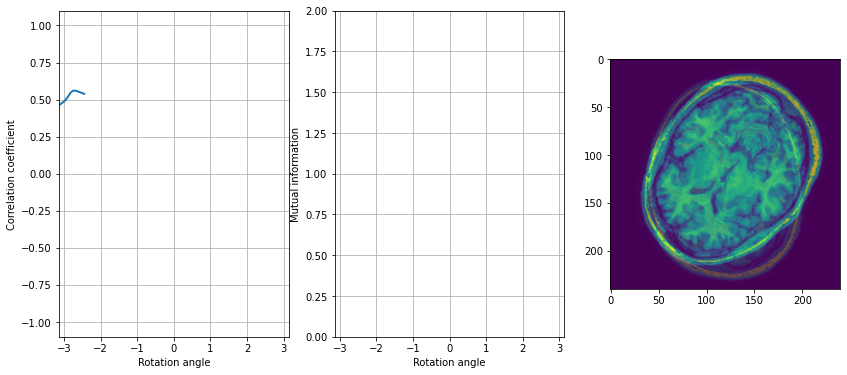

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import registration_metrics_demo

registration_metrics_demo()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.3.1*:
Run the demo again but this time compute the similarity of the T1w image with a rotated version of the T2w image for different angles (note that the T1w and T2w images in this example are registered). Describe and analyze the results. Would the normalized cross-correlation metric be suitable to register the T1w and T2w images? Which of the two analyzed metrics would be more appropriate? Motivate your answer.

<font style="color:red">Type your answer here</font>